In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:/Users/SAIDHANUSH/ggstore_train.csv')

In [3]:
df1=pd.read_csv(r'C:/Users/SAIDHANUSH/ggstore_test.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


In [5]:
df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Id                False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             5616 non-null   object 
 1   Category        5616 non-null   object 
 2   Rating          5616 non-null   float64
 3   Reviews         5616 non-null   int64  
 4   Size            5616 non-null   float64
 5   Installs        5616 non-null   float64
 6   Type            5616 non-null   int64  
 7   Price           5616 non-null   float64
 8   Content Rating  5616 non-null   object 
 9   Genres          5616 non-null   object 
 10  Last Updated    5616 non-null   object 
 11  Id              5616 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
l=LabelEncoder()

In [10]:
fea=df.iloc[:,[1,8,9]]

In [17]:
df['Category']=l.fit_transform(df['Category'])
df1['Category']=l.fit_transform(df1['Category'])

In [18]:
df['Content Rating']=l.fit_transform(df['Content Rating'])
df1['Content Rating']=l.fit_transform(df1['Content Rating'])

In [19]:
df['Genres']=l.fit_transform(df['Genres'])
df1['Genres']=l.fit_transform(df1['Genres'])

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,10000.0,0,0.0,1,9,2018-01-07,0
1,Coloring book moana,0,3.9,967,14.0,500000.0,0,0.0,1,11,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,5000000.0,0,0.0,1,9,2018-08-01,2
3,Sketch - Draw & Paint,0,4.5,215644,25.0,50000000.0,0,0.0,4,9,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,100000.0,0,0.0,1,10,2018-06-20,4


In [21]:
x=df.iloc[:,[1,3,4,5,6,7,8,9]]

In [22]:
y=df.Rating

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
forest=RandomForestRegressor()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
pred=forest.predict(x_test)
pred

array([4.309, 4.671, 4.221, ..., 4.114, 4.259, 3.792])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
import numpy as np

In [32]:
score=mean_squared_error(y_test,pred)

In [33]:
np.sqrt(score)

0.5519880874450978

In [34]:
import xgboost

In [36]:
xgb=xgboost.XGBRegressor()

In [37]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
pred1=xgb.predict(x_test)

In [39]:
score1=mean_squared_error(y_test,pred1)

In [40]:
np.sqrt(score1)

0.5573859834909146

In [64]:
import seaborn as sns

<AxesSubplot:xlabel='Rating'>

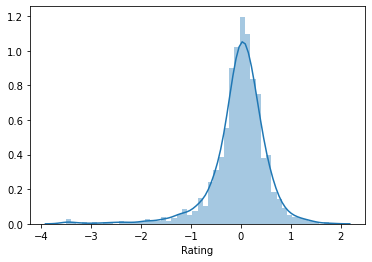

In [65]:
sns.distplot(y_test-pred1)

In [41]:
from sklearn.ensemble import BaggingRegressor

In [42]:
bag= BaggingRegressor()

In [43]:
bag.fit(x_train,y_train)

BaggingRegressor()

In [44]:
pred2=bag.predict(x_test)

In [45]:
score2=mean_squared_error(y_test,pred2)

In [46]:
np.sqrt(score2)

0.567189723752404

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
tr=DecisionTreeRegressor()

In [49]:
tr.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
pred3=tr.predict(x_test)

In [51]:
score3=mean_squared_error(y_test,pred3)

In [52]:
np.sqrt(score3)

0.704240144762184

In [53]:
from sklearn import svm


In [54]:
s=svm.SVR()

In [55]:
s.fit(x_train,y_train)

SVR()

In [56]:
pred4=s.predict(x_test)

In [57]:
score4=mean_squared_error(y_test,pred4)

In [58]:
np.sqrt(score4)

0.588152986207181

# so random forest algorithm is giving us less error compared to other algorithm

In [59]:
df1.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Dr.Android Repair Master 2017,23,1205,4.3,100000.0,0,0.00,0,48,2018-06-10,5617
1,DR CONTROL,9,267,1.5,10000.0,0,0.00,0,30,2017-03-08,5618
2,Dr Driving Racer,12,183,68.0,10000.0,0,0.00,0,53,2018-06-14,5619
3,Dr. McDougall Mobile Cookbook,13,76,1.2,1000.0,1,4.99,0,37,2015-01-26,5620
4,Dr. Seuss's ABC,9,429,12.0,10000.0,1,3.99,0,10,2018-02-26,5621


In [60]:
xt=df1.iloc[:,[1,2,3,4,5,6,7,8]]

In [61]:
predicted_test=forest.predict(xt)

In [63]:
my=pd.DataFrame({'id':df1['Id'],'rating':predicted_test})
my.to_csv('submission_kaggle.csv',index=False)